In [12]:
import unicodedata
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('data/train_pre.csv')

In [14]:
df = df.drop(columns=['Nd', 'Cc', 'No', 'Nl', 'Co', 'Cn'])

In [15]:
df3 = df.groupby(["Language"]).mean()
print(df3)

              Lu       Ll      Zs      Po     Pd     Ps     Pe       Lo  \
Language                                                                  
ace       13.472  223.534  43.992   7.480  0.784  0.434  0.432    0.530   
afr       13.716  331.412  69.256   9.190  1.276  0.636  0.636    0.068   
als       21.422  265.276  56.234   8.472  0.900  0.796  0.710    0.096   
amh        0.676    4.290  56.952   8.312  0.534  0.944  0.934  217.340   
ang       10.642  207.452  41.732   6.336  0.348  0.542  0.532    0.190   
...          ...      ...     ...     ...    ...    ...    ...      ...   
yid        0.678    4.182  59.784   8.054  0.506  0.490  0.490  277.694   
yor       13.836  242.096  62.848   7.888  1.432  1.120  1.122    0.514   
zea       10.920  227.444  50.208  11.152  0.850  0.382  0.380    0.146   
zh-yue     3.958   35.150   7.086  14.244  0.376  2.500  2.498  136.054   
zho        5.762   12.770   2.656  17.778  0.372  2.296  2.300  194.570   

             Mc     Mn  

In [16]:
from sklearn.feature_selection import VarianceThreshold

X = df3.to_numpy()
print(X.shape)

(234, 19)


In [18]:
selector = VarianceThreshold(0.5)
new_x = selector.fit_transform(X)
print(new_x.shape)

(234, 10)
[[1.34720e+01 2.23534e+02 4.39920e+01 ... 2.80000e-02 3.20000e-02
  2.00000e-03]
 [1.37160e+01 3.31412e+02 6.92560e+01 ... 0.00000e+00 1.00000e-02
  4.00000e-03]
 [2.14220e+01 2.65276e+02 5.62340e+01 ... 2.00000e-02 4.00000e-03
  5.00000e-02]
 ...
 [1.09200e+01 2.27444e+02 5.02080e+01 ... 1.00000e-02 4.00000e-03
  0.00000e+00]
 [3.95800e+00 3.51500e+01 7.08600e+00 ... 2.20000e-02 1.60000e-02
  7.80000e-02]
 [5.76200e+00 1.27700e+01 2.65600e+00 ... 1.00000e-02 6.00000e-03
  4.00000e-03]]


In [4]:
df = df.reset_index()

In [5]:
df2 = pd.get_dummies(df['Language'], prefix='Lang')
print(df2)

        Lang_ace  Lang_afr  Lang_als  Lang_amh  Lang_ang  Lang_ara  Lang_arg  \
0              0         0         0         0         0         0         0   
1              0         0         0         0         0         0         0   
2              0         0         0         0         0         0         0   
3              0         0         0         0         0         0         0   
4              0         0         0         0         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
117495         0         0         0         0         0         0         0   
117496         0         0         0         0         0         0         0   
117497         0         0         0         0         0         0         0   
117498         0         0         0         0         0         0         0   
117499         0         0         0         0         0         0         0   

        Lang_arz  Lang_asm  Lang_ast  .

In [6]:
x = df.drop('Language', axis=1).drop('index', axis=1)
print(x)

        Lu   Ll   Zs  Po  Pd  Ps  Pe   Lo  Mc  Mn  Pi  Pf  Cf  Sm  Lm  So  Sc  \
0        9  283   45   6   2   0   0    0   0   0   0   0   0   0   0   0   0   
1       17  120   31  11   3   3   3    0   0   0   0   0   0   0   0   0   0   
2        0    0   63   8   0   0   0  237  61  67   0   0   0   0   0   0   0   
3       42  750  159  37   1  16  15    0   0   0   2   4   0   0   0   0   0   
4        3   15   13   1   0   1   1  179   0  41   0   0   0   0   0   0   0   
...     ..  ...  ...  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
117495  26  792  187  27   0   3   3    0   0   0   0   0   0   0   0   0   0   
117496  14  200   45   9   1   0   0    0   0   0   0   0   0   0   0   0   0   
117497   0    0    0  34   0   1   1  195   0   0   0   0   0   0   0   0   0   
117498  19  495  106  16   0   0   0    0   0   0   0   0   0   0   0   0   0   
117499   6  238   46   4   0   0   0    0   0   0   0   0   0   0   0   0   0   

        Sk  Pc  
0        0

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(x, df2, test_size=0.20, random_state=0)

# fitting the model
model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

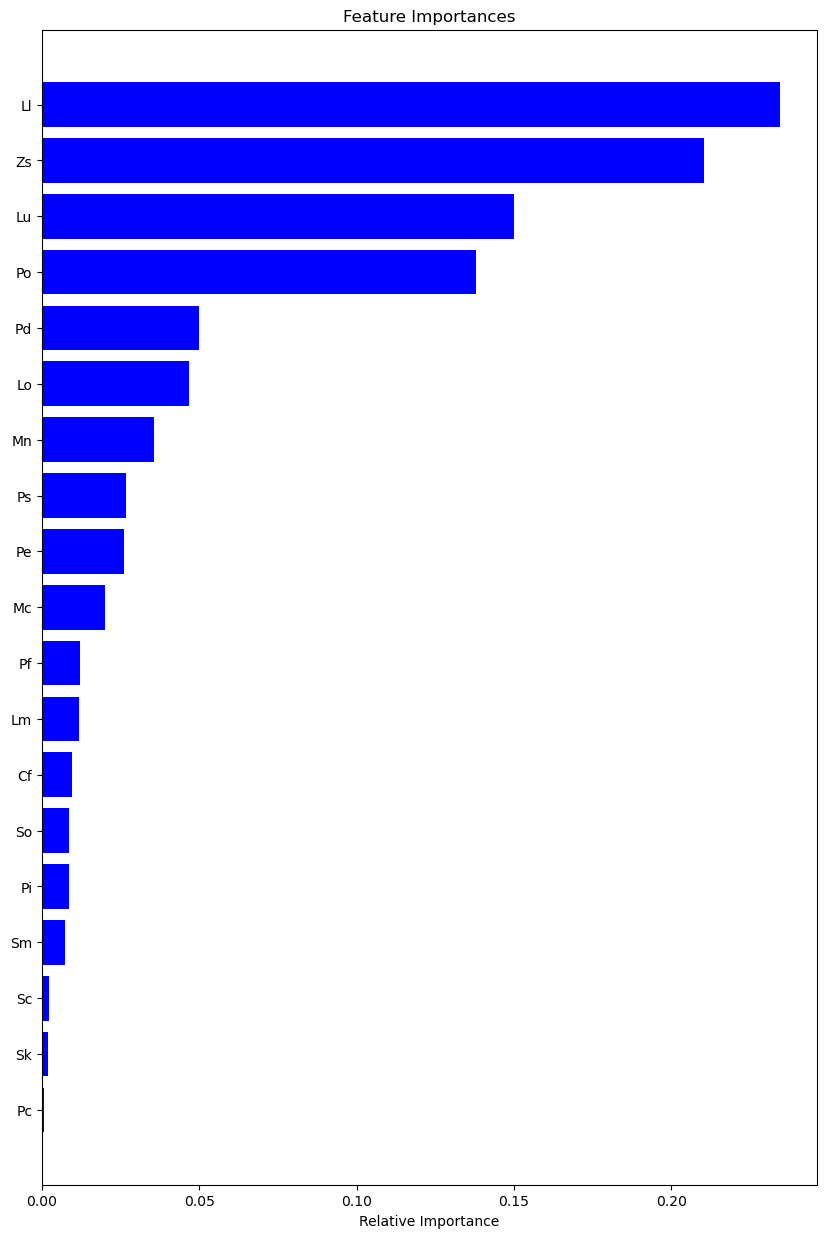

In [8]:
# plotting feature importances
features = df.drop('Language', axis=1).columns
features = features.drop('index')
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()